In [58]:
import torch
import torch.nn as nn
import numpy as np

import torch
import torch.backends.cudnn as cudnn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR100

In [59]:
class PadPrompter(nn.Module):
    def __init__(self):
        super(PadPrompter, self).__init__()
        pad_size = 10
        image_size = 84

        self.base_size = image_size - pad_size*2
        self.pad_up = nn.Parameter(torch.randn([1, 3, pad_size, image_size]))
        self.pad_down = nn.Parameter(torch.randn([1, 3, pad_size, image_size]))
        self.pad_left = nn.Parameter(torch.randn([1, 3, image_size - pad_size*2, pad_size]))
        self.pad_right = nn.Parameter(torch.randn([1, 3, image_size - pad_size*2, pad_size]))

    def forward(self, x):
        base = torch.zeros(1, 3, self.base_size, self.base_size)
        prompt = torch.cat([self.pad_left, base, self.pad_right], dim=3)
        prompt = torch.cat([self.pad_up, prompt, self.pad_down], dim=2)
        prompt = torch.cat(x.size(0) * [prompt])

        return x + prompt

In [60]:
prompt = PadPrompter()

In [61]:
# create data
preprocess = transforms.Compose([
    transforms.Resize(84),
    transforms.CenterCrop(84),
    transforms.ToTensor()
])

train_dataset = CIFAR100("./data", transform=preprocess,
                          download=True, train=True)

val_dataset = CIFAR100("./data", transform=preprocess,
                        download=True, train=False)

train_loader = DataLoader(train_dataset,
                          batch_size=32, pin_memory=True,
                          num_workers=16, shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


In [62]:
train_features, train_labels = next(iter(train_loader))

Feature batch shape: torch.Size([32, 3, 84, 84])
Labels batch shape: torch.Size([32])


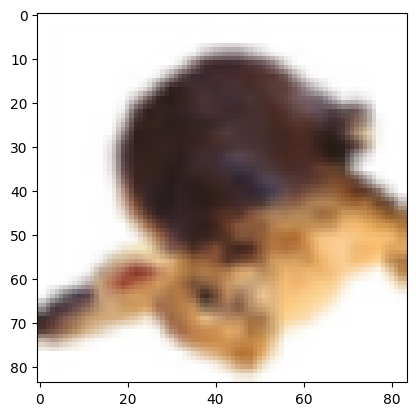

Label: 65


In [63]:
import matplotlib.pyplot as plt

print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].T
image = train_features[0]
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [64]:
prompted_images = prompt(image)[0]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


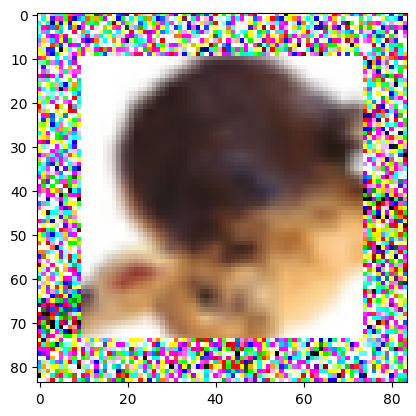

In [65]:
numpy_data = prompted_images.detach().numpy()


plt.imshow(numpy_data.T, cmap="gray")
plt.show()